In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Times New Roman',] # windows->Heiti TC
plt.rcParams['axes.unicode_minus'] = False # windows->simhei
plt.rcParams['figure.dpi'] = 200

import geopandas as gpd
import shapely
from shapely.geometry import Point,Polygon,LineString,MultiLineString,MultiPoint,MultiPolygon

import pickle
from tqdm import tqdm
from glob import glob
import joblib

# import northarrow
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
import os

import platform
if platform.system() == "Windows":
    os.chdir(r'H:\BaiduSyncdisk\DR.MENG-Full\Y2024-002-DT-NANJING-ACCESSIBILITY-MAUP')
else:
    os.chdir(r'/Volumes/SANDISK/DR.MENG')

In [3]:
parks = gpd.read_file('./parks/parks.shp')

In [4]:
# parks

In [5]:
buildings = gpd.read_file(r"./od_request_data_buildings/buildings_with_id.geojson")

In [6]:
buildings

,floors,building_id,geometry
0,2.0,b_0,"POLYGON ((118.72926 31.99482, 118.72953 31.994..."
1,2.0,b_1,"POLYGON ((118.72762 31.99548, 118.72758 31.995..."
2,2.0,b_2,"POLYGON ((118.72758 31.99552, 118.72762 31.995..."
3,2.0,b_3,"POLYGON ((118.72744 31.9957, 118.7275 31.99564..."
4,2.0,b_4,"POLYGON ((118.72751 31.99613, 118.72747 31.996..."
...,...,...,...
139986,20.0,b_139986,"POLYGON ((118.8248 31.90135, 118.8248 31.90118..."
139987,20.0,b_139987,"POLYGON ((118.82475 31.90083, 118.82475 31.900..."
139988,20.0,b_139988,"POLYGON ((118.82389 31.90074, 118.82389 31.900..."
139989,20.0,b_139989,"POLYGON ((118.82394 31.90022, 118.82394 31.900..."


# GRID LEVEL

In [7]:
grid_names = [
    'grid250',
    'grid500',
    'grid1000',
    'grid1500',
    'grid2000',
    'grid2500',
    'grid3000',
    'community',
    'buildings',
]

trans_types = [
    'walk',
    'cycle',
    'pt',
    'nav'
]
time_thresholds = [
    900,
    1800
]

In [8]:
grid = grid_names[2]
trans = trans_types[2]
threshold = time_thresholds[1]

In [9]:
file_path = f'./data_access_geojson/od_{trans}_{grid}_od_{threshold}.geojson'
file_path

'./data_access_geojson/od_pt_grid1000_od_1800.geojson'

In [10]:
# file_path = f'./data_access_shp/od_walk_buildings_900.shp'
# file_path

In [11]:
data = gpd.read_file(file_path)

In [12]:
data

,net_id,Id,access_val,geometry
0,g_3114,south,0.0,"POLYGON ((118.77399 31.86959, 118.77474 31.878..."
1,g_3115,south,0.0,"POLYGON ((118.78446 31.86894, 118.78522 31.877..."
2,g_3116,south,0.0,"POLYGON ((118.79494 31.8683, 118.79569 31.8772..."
3,g_3117,south,0.0,"POLYGON ((118.80541 31.86765, 118.80617 31.876..."
4,g_3157,south,0.0,"POLYGON ((118.75379 31.87982, 118.75454 31.888..."
...,...,...,...,...
960,g_6135,north,0.0,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257..."
963,g_6177,north,0.0,"POLYGON ((118.74365 32.25784, 118.74442 32.266..."


In [13]:
data_sl = data[(data['access_val'] <= data['access_val'].quantile(0.95)) &\
               (data['access_val'] >= data['access_val'].quantile(0.05))]

In [14]:
data_sl

,net_id,Id,access_val,geometry
0,g_3114,south,0.0,"POLYGON ((118.77399 31.86959, 118.77474 31.878..."
1,g_3115,south,0.0,"POLYGON ((118.78446 31.86894, 118.78522 31.877..."
2,g_3116,south,0.0,"POLYGON ((118.79494 31.8683, 118.79569 31.8772..."
3,g_3117,south,0.0,"POLYGON ((118.80541 31.86765, 118.80617 31.876..."
4,g_3157,south,0.0,"POLYGON ((118.75379 31.87982, 118.75454 31.888..."
...,...,...,...,...
960,g_6135,north,0.0,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257..."
963,g_6177,north,0.0,"POLYGON ((118.74365 32.25784, 118.74442 32.266..."


In [15]:
import mapclassify

In [16]:
mapclassify.NaturalBreaks(data_sl['access_val'])

NaturalBreaks

   Interval      Count
----------------------
[ 0.00,  4.37] |   722
( 4.37, 14.24] |   107
(14.24, 29.22] |    44
(29.22, 48.62] |    23
(48.62, 76.13] |    20

In [17]:
res = gpd.sjoin(data_sl, parks, predicate='within')
data_sl = data_sl[~data_sl['net_id'].isin(res['net_id'])]

In [18]:
data_sl

,net_id,Id,access_val,geometry
0,g_3114,south,0.0,"POLYGON ((118.77399 31.86959, 118.77474 31.878..."
1,g_3115,south,0.0,"POLYGON ((118.78446 31.86894, 118.78522 31.877..."
2,g_3116,south,0.0,"POLYGON ((118.79494 31.8683, 118.79569 31.8772..."
3,g_3117,south,0.0,"POLYGON ((118.80541 31.86765, 118.80617 31.876..."
4,g_3157,south,0.0,"POLYGON ((118.75379 31.87982, 118.75454 31.888..."
...,...,...,...,...
960,g_6135,north,0.0,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257..."
963,g_6177,north,0.0,"POLYGON ((118.74365 32.25784, 118.74442 32.266..."


In [19]:
res = gpd.sjoin(data_sl, buildings, predicate='contains') 

In [20]:
res

,net_id,Id,access_val,geometry,index_right,floors,building_id
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126424,6.0,b_126424
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126426,6.0,b_126426
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126421,6.0,b_126421
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126427,6.0,b_126427
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126420,6.0,b_126420
...,...,...,...,...,...,...,...
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578...",54351,2.0,b_54351
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578...",54354,20.0,b_54354
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257...",72755,6.0,b_72755
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257...",72754,6.0,b_72754


In [21]:
data_s2 = data_sl[data_sl['net_id'].isin(res['net_id'])]

In [22]:
data_s2

,net_id,Id,access_val,geometry
8,g_3161,south,0.000000,"POLYGON ((118.79569 31.87724, 118.79645 31.886..."
9,g_3162,south,0.000000,"POLYGON ((118.80617 31.87659, 118.80693 31.885..."
26,g_3255,south,0.000000,"POLYGON ((118.80769 31.89447, 118.80844 31.903..."
27,g_3256,south,1.043759,"POLYGON ((118.81816 31.89382, 118.81892 31.902..."
33,g_3297,south,67.638296,"POLYGON ((118.77701 31.90534, 118.77777 31.914..."
...,...,...,...,...
957,g_6098,north,0.484653,"POLYGON ((118.76316 32.23866, 118.76393 32.247..."
959,g_6134,north,0.000000,"POLYGON ((118.72185 32.2502, 118.72261 32.2591..."
960,g_6135,north,0.000000,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.000000,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."


In [23]:
data_s2[data_s2['access_val'] == 0]

,net_id,Id,access_val,geometry
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886..."
9,g_3162,south,0.0,"POLYGON ((118.80617 31.87659, 118.80693 31.885..."
26,g_3255,south,0.0,"POLYGON ((118.80769 31.89447, 118.80844 31.903..."
36,g_3300,south,0.0,"POLYGON ((118.80844 31.9034, 118.8092 31.91234..."
37,g_3301,south,0.0,"POLYGON ((118.81892 31.90276, 118.81968 31.911..."
...,...,...,...,...
954,g_6095,north,0.0,"POLYGON ((118.73161 32.24061, 118.73237 32.249..."
959,g_6134,north,0.0,"POLYGON ((118.72185 32.2502, 118.72261 32.2591..."
960,g_6135,north,0.0,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."


In [84]:
data_s2.describe()

,access_val
count,585.000000
mean,5.776685
std,12.316408
min,0.000000
25%,0.000000
50%,0.707805
75%,5.242726
max,76.133272


In [91]:
def plot_rg(df):
    _sum = len(df)
    
    l0 = df.query("access_val==0")
    l1 = df.query("access_val>0 and access_val<=1")
    l2 = df.query("access_val>1 and access_val<=2")
    l3 = df.query("access_val>2 and access_val<=3")
    l4 = df.query("access_val>3 and access_val<=4")
    l5 = df.query("access_val>4 and access_val<=5")
    lx = df.query("access_val>5")
    
    s0 = len(l0)
    s1 = len(l1)
    s2 = len(l2)
    s3 = len(l3)
    s4 = len(l4)
    s5 = len(l5)
    sx = len(lx)
    
    dv = pd.DataFrame({'Range': [s0,s1,s2,s3,s4,s5,sx]})
    dv['Percent'] = (dv['Range'] / _sum).round(3)
    
    dic = {
        'df': dv,
        'Mean': df['access_val'].mean(),
        'Median': df['access_val'].median(),
        'Std': df['access_val'].std(),
        'N': len(df)
    }
    
    return dic

In [92]:
result = plot_rg(data_s2)
result

{'df':    Range  Percent
 0    193    0.330
 1    115    0.197
 2     50    0.085
 3     28    0.048
 4     27    0.046
 5     20    0.034
 6    152    0.260,
 'Mean': 5.776684738430441,
 'Median': 0.7078047051267191,
 'Std': 12.316407792450017,
 'N': 585}

In [97]:
import seaborn as sns

''

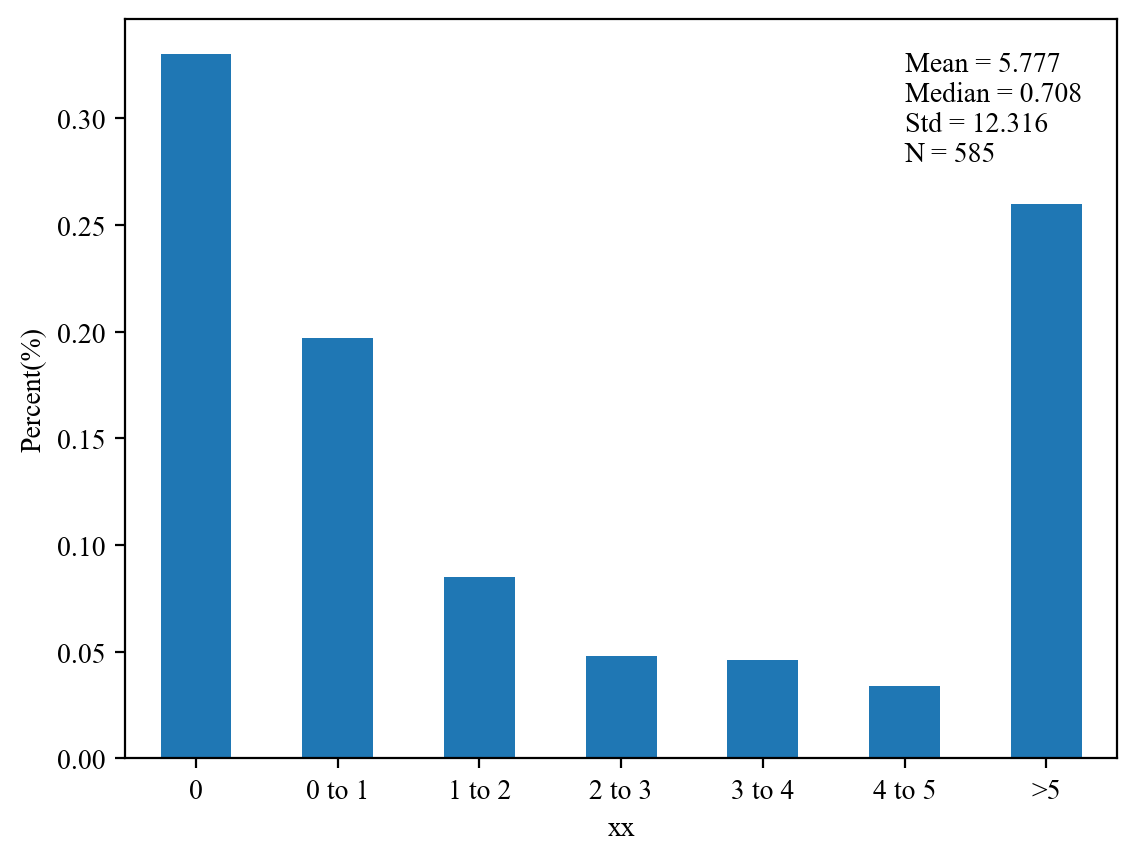

In [98]:
ax1 = result['df']['Percent'].plot(kind='bar')
ax1.set_xticks([i for i in range(7)])
ax1.set_xticklabels([0, '0 to 1', '1 to 2',
                     '2 to 3', '3 to 4', '4 to 5', '>5'], rotation=0)

ax1.text(5,0.28,'Mean = {:.3f}\nMedian = {:.3f}\nStd = {:.3f}\nN = {}'.format(result['Mean'],
                                                                result['Median'],
                                                                result['Std'],
                                                                result['N']))
ax1.set_xlabel('xx')
ax1.set_ylabel('Percent(%)')
;

In [ ]:
"""

"""